In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df =  pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")
train_df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
train_df.describe()

,Petrol (USD)
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [5]:
train_df.isnull().sum()
#df.Date.isna().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [6]:
train_df = train_df.dropna()

In [7]:
# Convert 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date']  = pd.to_datetime(test_df['Date'])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          811 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.0 KB


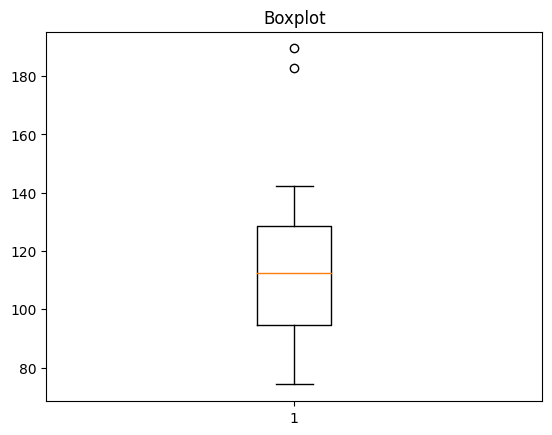

In [9]:
plt.boxplot(train_df['Petrol (USD)']);plt.title('Boxplot');plt.show()

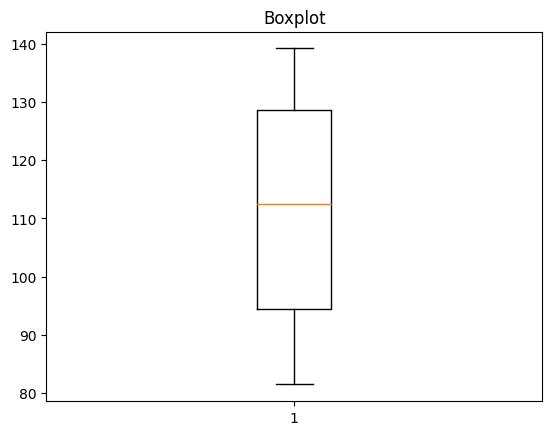

In [10]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='gaussian', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5
                          )
train_df['Petrol (USD)']=winsor.fit_transform(train_df[['Petrol (USD)']])

plt.boxplot(train_df['Petrol (USD)']);plt.title('Boxplot');plt.show()

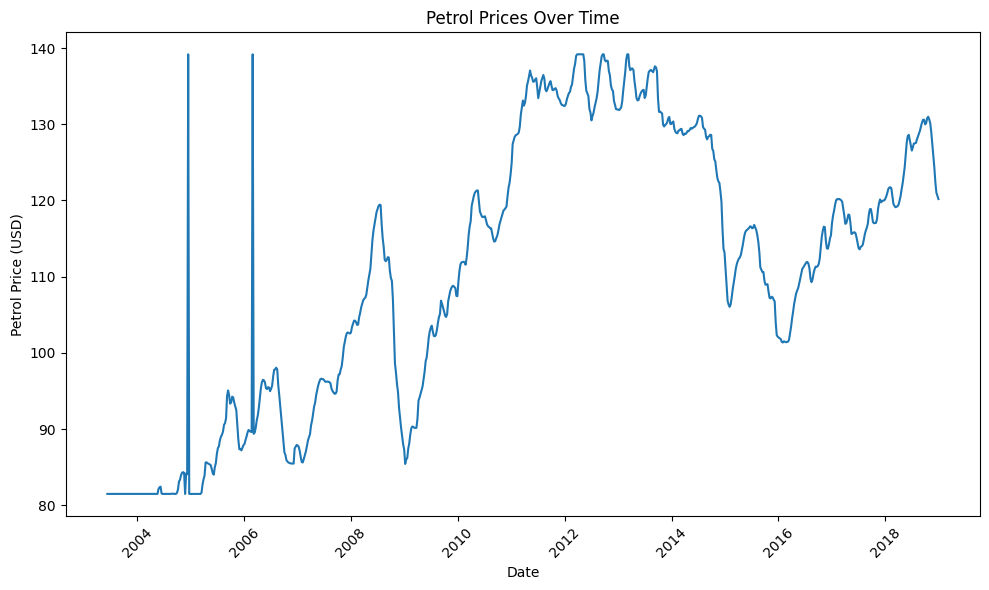

In [11]:
# Plot a line chart to visualize the trend of petrol prices over time
plt.figure(figsize=(10, 6))
plt.plot(train_df['Date'], train_df['Petrol (USD)'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Feature Engineering: Extract additional features from the 'Date' column
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

# Feature Engineering: Extract additional features from the 'Date' column
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day

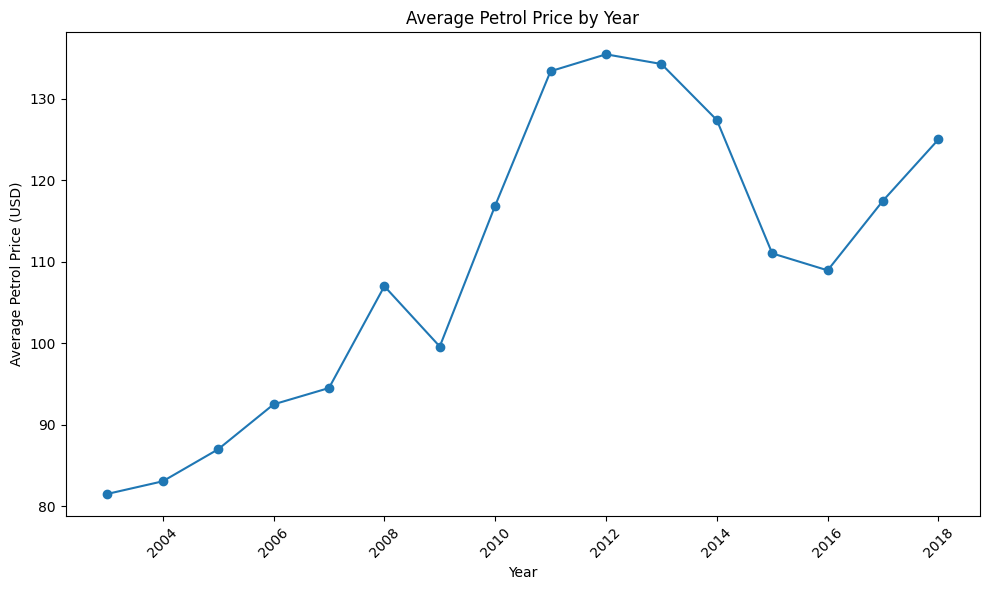

In [13]:
# Plot the average petrol price by year
plt.figure(figsize=(10, 6))
avg_price_by_year = train_df.groupby('Year')['Petrol (USD)'].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o')
plt.title('Average Petrol Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

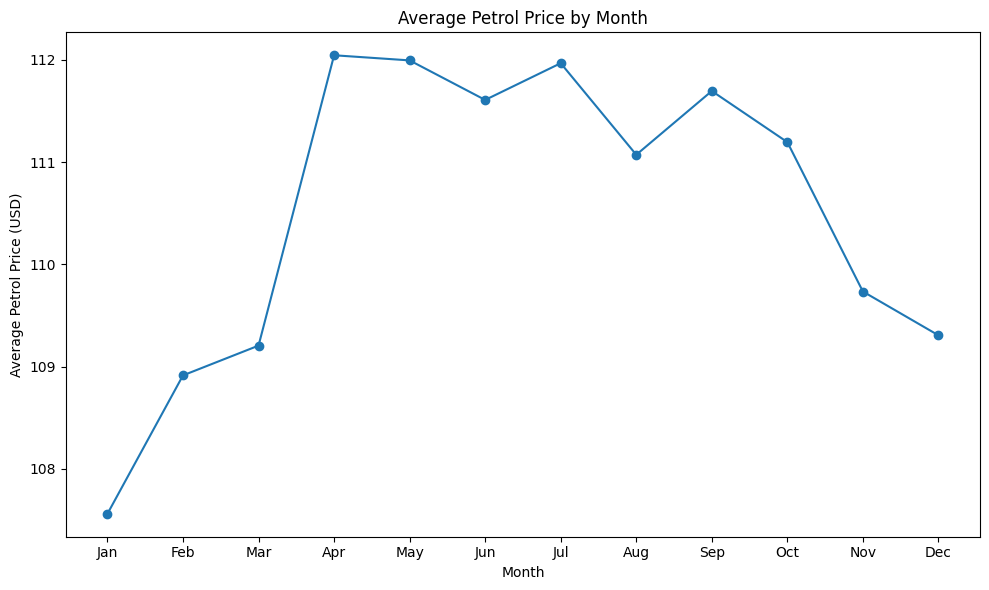

In [14]:
# Plot the average petrol price by month
plt.figure(figsize=(10, 6))
avg_price_by_month = train_df.groupby('Month')['Petrol (USD)'].mean()
plt.plot(avg_price_by_month.index, avg_price_by_month.values, marker='o')
plt.title('Average Petrol Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Petrol Price (USD)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_9612\2987798298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Petrol (USD)'])


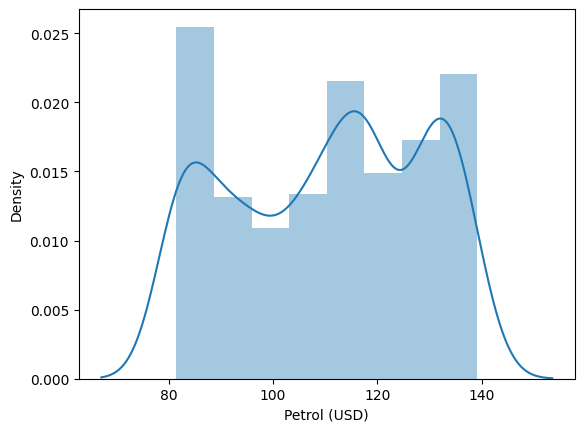

In [15]:
# plot the distribution
import seaborn as sns

sns.distplot(train_df['Petrol (USD)'])

# show the plot
plt.show()

In [ ]:
# Convert categorical variables (e.g., Month) into dummy/indicator variables
#train_df = pd.get_dummies(train_df, columns=['Month'], drop_first=True)
#test_df = pd.get_dummies(test_df, columns=['Month'], drop_first=True)

In [16]:
train_df.head()

,Date,Petrol (USD),Year,Month,Day
0,2003-06-09,81.486507,2003,6,9
1,2003-06-16,81.486507,2003,6,16
2,2003-06-23,81.486507,2003,6,23
3,2003-06-30,81.486507,2003,6,30
4,2003-07-07,81.486507,2003,7,7


In [18]:
test_df.head()

,Date,Prediction,Year,Month,Day
0,2019-01-01,NaN,2019,1,1
1,2019-01-02,NaN,2019,1,2
2,2019-01-03,NaN,2019,1,3
3,2019-01-04,NaN,2019,1,4
4,2019-01-05,NaN,2019,1,5


### Splitting Data

In [17]:
# Split the data into features (X) and target (y)
X = train_df[['Year','Month','Day']]
y = train_df['Petrol (USD)']

In [ ]:
# Split the data into features (X) and target (y)
#X = df['Date']
#y = df['Petrol (USD)']

In [18]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Model Building

### Baseline Model

In [19]:
# Calculate the mean of the target variable
mean_target = y_train.mean()

# Create an array of predictions with the same length as the test set
baseline_predictions = [mean_target] * len(X_train)
baseline_predictions

[110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577998811,
 110.14208577

In [20]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, baseline_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"MSE:{mse} RMSE:{rmse}")

MSE:333.0374996657257 RMSE:18.249315046481215


### Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train,y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

mse1 = mean_squared_error(y_train, train_pred)
mse2 = mean_squared_error(y_test, test_pred)
                   
rmse_rf = print(f'Train :  MSE: {mse1} RMSE: {np.sqrt(mse1)}')
rmse_rf = print(f'Test: MSE: {mse2} RMSE: {np.sqrt(mse2)}')
#print(f'Random Forest RMSE: {rmse_rf}')

Train :  MSE: 0.18057697527454414 RMSE: 0.42494349656694846
Test: MSE: 69.11949450255166 RMSE: 8.313813475328374


### Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

mse1 = mean_squared_error(y_train, train_pred)
mse2 = mean_squared_error(y_test, test_pred)
                   
rmse_rf = print(f'Train :  MSE: {mse1} RMSE: {np.sqrt(mse1)}')
rmse_rf = print(f'Test: MSE: {mse2} RMSE: {np.sqrt(mse2)}')

Train :  MSE: 160.0223610734115 RMSE: 12.649994508829302
Test: MSE: 223.30613874232216 RMSE: 14.943431290781986


In [23]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

### Prophet Model

In [24]:
# Split the # Prophet requires that your DataFrame has two columns: 'ds' and 'y'
# 'ds' should be a column of date or datetime values
# 'y' should be a column of numeric values representing your target variable

# data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df['Date'],train_df['Petrol (USD)'] , test_size=0.2, random_state=0)

train_df = pd.DataFrame({'ds': X_train, 'y': y_train})
test_df = pd.DataFrame({'ds': X_test, 'y': y_test})

In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Create Prophet model
model = Prophet(growth='flat',interval_width=0.80, daily_seasonality=True)

# Fit the model to the data
model.fit(train_df)

11:20:29 - cmdstanpy - INFO - Chain [1] start processing
11:20:29 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
prediction = model.predict(test_df)
prediction[['ds','yhat']]

,ds,yhat
0,2003-06-16,111.272815
1,2003-06-23,112.544261
2,2003-07-14,110.494915
3,2003-08-04,108.687690
4,2003-08-18,109.994614
...,...,...
158,2018-07-23,108.628872
159,2018-07-30,108.432054
160,2018-10-29,108.948721
161,2018-11-12,107.961405


In [38]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_df['y'], prediction['yhat'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"MSE:{mse} RMSE:{rmse}")

MSE:342.481691118613 RMSE:18.50626086270841


### ARIMA Model

<AxesSubplot: >

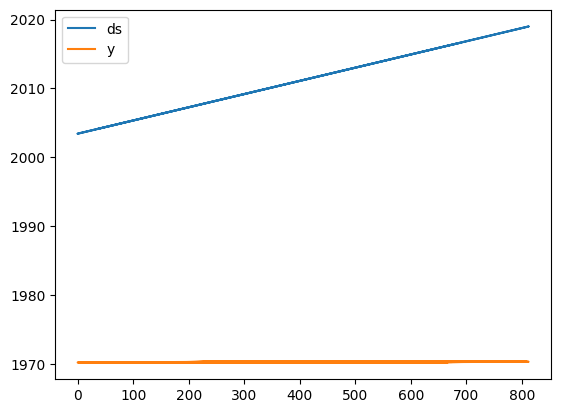

In [39]:
train_df.plot()

In [40]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [41]:
test = pd.read_csv('test_data.csv')
test['Date'] = pd.to_datetime(test['Date'],format='%d/%m/%Y')

In [43]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_df['y'], prediction['yhat'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"MSE:{mse} RMSE:{rmse}")

MSE:342.481691118613 RMSE:18.50626086270841


In [44]:
test_data = test.rename(columns={'Date':'ds'})
prediction = model.predict(test_data)
prediction[['ds', 'yhat']]

,ds,yhat
0,2019-01-01,80.788788
1,2019-02-01,106.250673
2,2019-03-01,108.250337
3,2019-04-01,108.561148
4,2019-05-01,138.548972
5,2019-06-01,112.079980
6,2019-07-01,113.218420
7,2019-08-01,108.151983
8,2019-09-01,111.674618
9,2019-10-01,83.821778


In [45]:
# Plot the predictions
plot_plotly(model,prediction)

In [46]:
# plot the model componets
plot_components_plotly(model, prediction)

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\io\_json.py:534: UserWarning:

Discarding nonzero nanoseconds in conversion.

